# **BASIC SETUP**

DATA FROM

Premier League Stats | FBref.com

In [ ]:
# Import the required libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
epl_df = pd.read_excel('/content/final_data eda.xlsx')

Here’s a brief description of each attribute from our English Premier League dataset:

-->**Season:**The year or years the matches took place, indicating the league season.

-->**Date**:The specific date on which the match was played.

-->**Time:** The time of day when the match commenced.

-->**Round:** The specific round or matchweek of the league in which the game occurred.

-->**Day:** The day of the week on which the match was played.

-->**Venue:** The location or stadium where the match took place.

-->**Result:** The final outcome of the match, typically represented as a score (e.g., 2-1).

-->**GF (Goals For)**: The number of goals scored by the team during the match.

-->**GA (Goals Against):** The number of goals conceded by the team during the match.

-->**Team:** The name of the team that played the match.

-->**Opponent:** The name of the opposing team in the match.

-->**Attendance:** The total number of spectators present at the match.

-->**Formation:** The tactical arrangement of the players used by the team in the match.

-->**Opp Formation:** The tactical arrangement of the opposing team’s players during the match.

-->**Captain:** The name of the player who served as the team captain during the match.

-->**Referee:** The name of the match official responsible for officiating the game.

-->**Poss (Possession):** The percentage of the match during which the team had possession of the ball.

-->**Gls:** Total goals scored by the player, typically used to evaluate individual performance.

-->**Sh (Shots):** The total number of shots taken by the team during the match.

-->**SoT (Shots on Target):** The number of shots that were on target, meaning they would have scored if not for the goalkeeper.

-->**G/Sh (Goals per Shot)**: The efficiency of the team’s shooting, calculated as goals scored divided by total shots taken.

-->**Save% (Save Percentage):** The percentage of shots on target that the goalkeeper successfully saved.

-->**CS (Clean Sheets):** The number of matches in which the team did not concede any goals.

-->**PK (Penalty Kicks):** The number of penalty kicks successfully converted by the team.

-->**PKatt (Penalty Kicks Attempted)**: The total number of penalty kicks attempted by the team.

-->**CrdY (Yellow Cards):** The number of yellow cards issued to the team during the match.

-->**CrdR (Red Cards):** The number of red cards issued to the team during the match.

-->**OG (Own Goals):** The number of own goals scored by the team during the match.

# **Data Overview and Structure**

In [ ]:
# Check the shape of the dataset
print("Shape of dataset:", epl_df.shape)

# Check data types and basic information
epl_df.info()

# Display the first and last few rows
print("First 5 rows:")
print(epl_df.head())
print("\nLast 5 rows:")
print(epl_df.tail())


Shape of dataset: (9081, 28)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9081 entries, 0 to 9080
Data columns (total 28 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Season         9081 non-null   object        
 1   Date           9081 non-null   datetime64[ns]
 2   Time           3001 non-null   object        
 3   Round          9081 non-null   object        
 4   Day            9081 non-null   object        
 5   Venue          9081 non-null   object        
 6   Result         9081 non-null   object        
 7   GF             9081 non-null   int64         
 8   GA             9081 non-null   int64         
 9   Team           9081 non-null   object        
 10  Opponent       9081 non-null   object        
 11  Attendance     8059 non-null   object        
 12  Formation      5291 non-null   object        
 13  Opp Formation  5291 non-null   object        
 14  Captain        2242 non-null   object      

# **Check for Missing Values**

In [ ]:
# Check for missing values in each column
missing_values = epl_df.isnull().sum()
print("Missing values per column:\n", missing_values)


Missing values per column:
 Season              0
Date                0
Time             6080
Round               0
Day                 0
Venue               0
Result              0
GF                  0
GA                  0
Team                0
Opponent            0
Attendance       1022
Formation        3790
Opp Formation    3790
Captain          6839
Referee             0
Poss             6080
Gls                 0
Sh               6080
SoT              6080
G/Sh             6081
Save%            6363
CS                239
PK                  0
PKatt            6080
CrdY              303
CrdR              265
OG                266
dtype: int64


## **Descriptive Statistics**

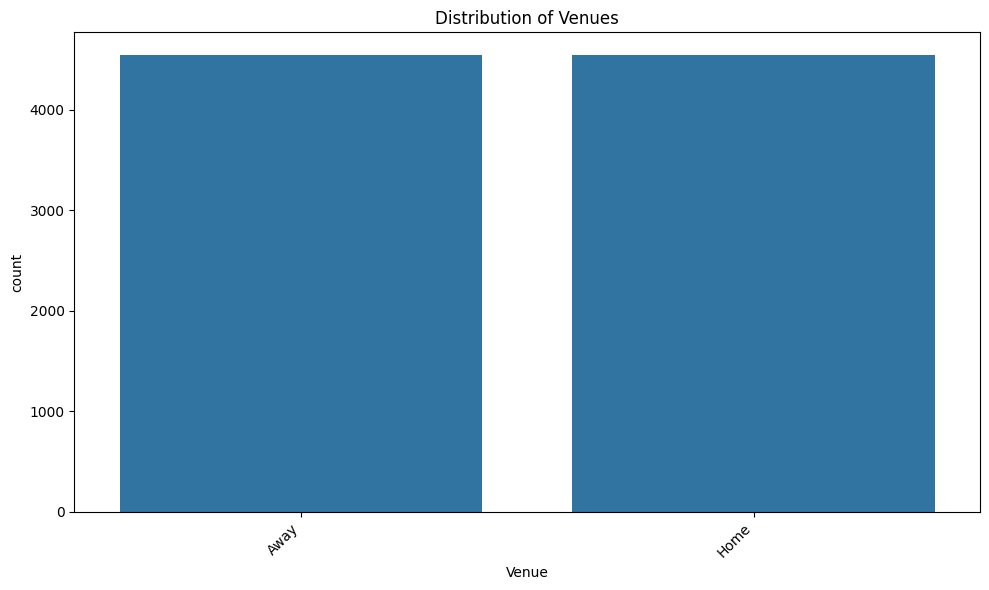

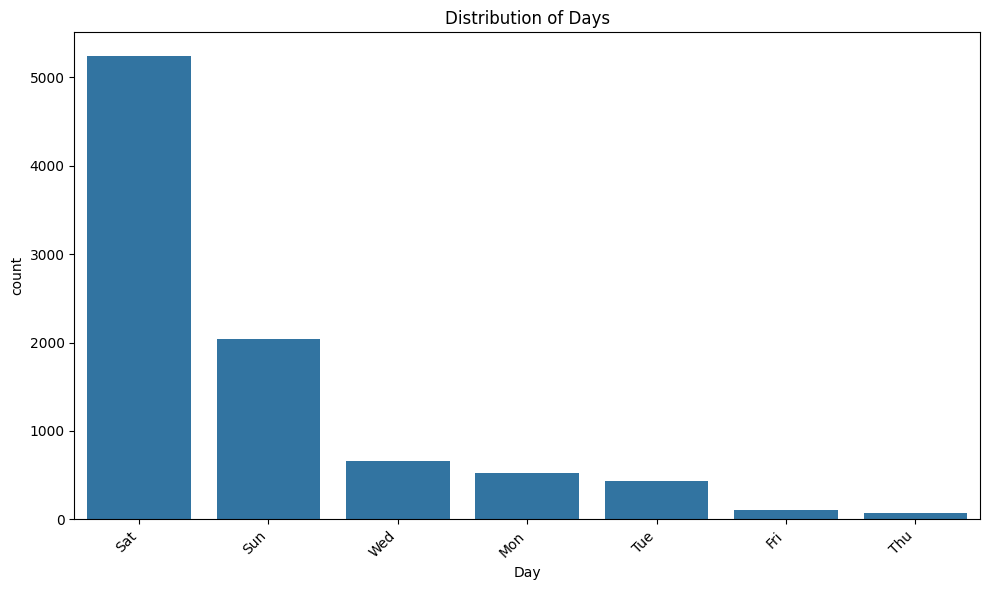

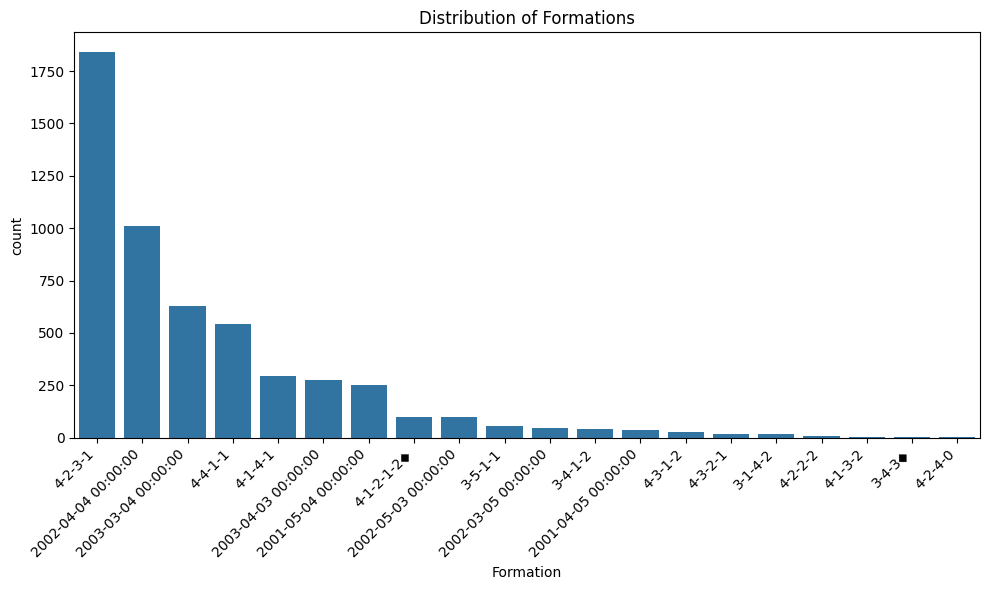

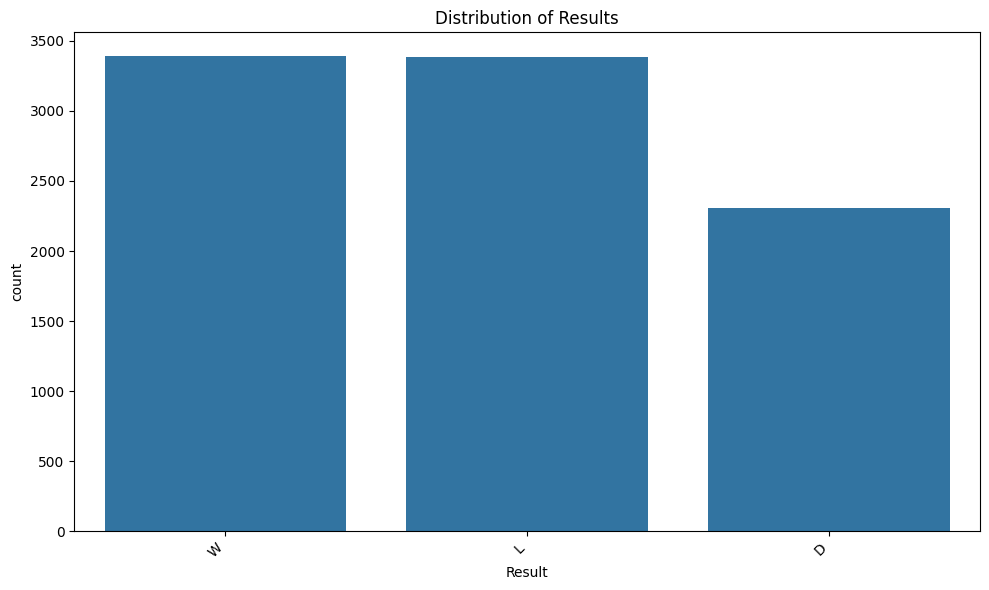

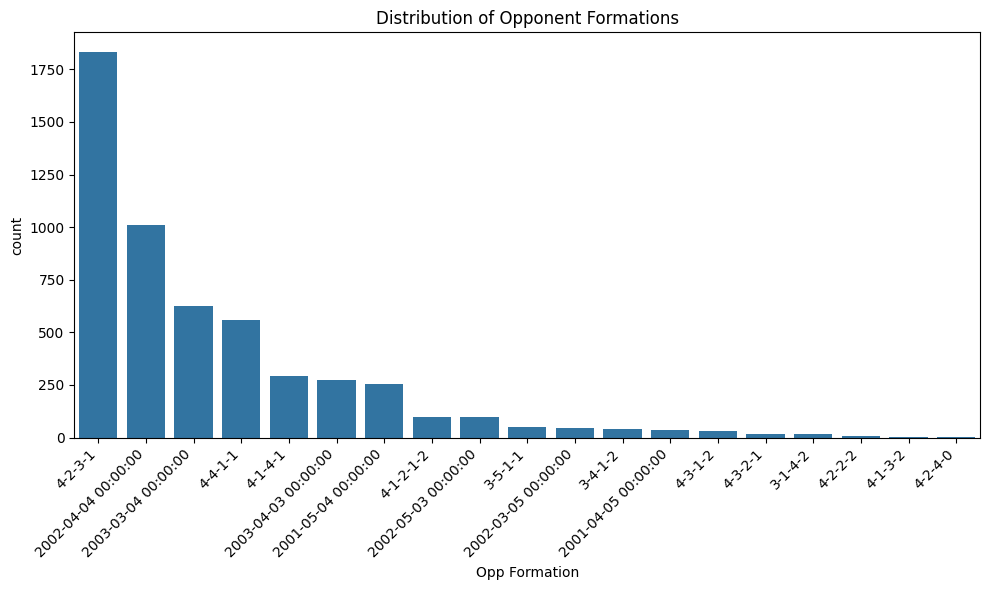

In [ ]:
# Function to plot value counts for a categorical column
def plot_value_counts(df, column_name, title):
    """Plots the value counts of a categorical column as a bar plot."""
    plt.figure(figsize=(10, 6))  # Adjust figure size as needed
    sns.countplot(x=column_name, data=df, order=df[column_name].value_counts().index)
    plt.title(title)
    plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
    plt.tight_layout()  # Adjust layout to prevent labels from overlapping
    plt.show()

# Plot value counts for categorical columns
plot_value_counts(epl_df, 'Venue', 'Distribution of Venues')
plot_value_counts(epl_df, 'Day', 'Distribution of Days')
plot_value_counts(epl_df, 'Formation', 'Distribution of Formations')
plot_value_counts(epl_df, 'Result', 'Distribution of Results')
plot_value_counts(epl_df, 'Opp Formation', 'Distribution of Opponent Formations')

# **DATA CONSISTENCY AND CLEANING**

> Add blockquote



In [ ]:
# Check for duplicate rows
duplicates = epl_df.duplicated().sum()
print("Number of duplicate rows:", duplicates)

# Convert Date to datetime format (if Date is not in datetime format)
epl_df['Date'] = pd.to_datetime(epl_df['Date'], errors='coerce')

# Check for unusual or outlier values
print("Attendance column - basic stats and outliers:")
print(epl_df['Attendance'].describe())
print("\nGF column - basic stats and outliers:")
print(epl_df['GF'].describe())
print("\nGA column - basic stats and outliers:")
print(epl_df['GA'].describe())
print("\nPossession column - basic stats and outliers:")
print(epl_df['Poss'].describe())

# Standardize categorical values (e.g., strip whitespace or unify team names)
epl_df['Team'] = epl_df['Team'].str.strip().str.upper()  # Example: Standardizing team names
epl_df['Opponent'] = epl_df['Opponent'].str.strip().str.upper()  # Standardize opponent names


Number of duplicate rows: 0
Attendance column - basic stats and outliers:
count      8059
unique     3686
top       34977
freq         44
Name: Attendance, dtype: int64

GF column - basic stats and outliers:
count    9081.000000
mean        1.318027
std         1.227598
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: GF, dtype: float64

GA column - basic stats and outliers:
count    9081.000000
mean        1.315824
std         1.227180
min         0.000000
25%         0.000000
50%         1.000000
75%         2.000000
max         8.000000
Name: GA, dtype: float64

Possession column - basic stats and outliers:
count    3001.000000
mean       50.119627
std        11.729280
min        18.000000
25%        42.000000
50%        50.000000
75%        59.000000
max        82.000000
Name: Poss, dtype: float64


# **CORRELATION MATRIX**

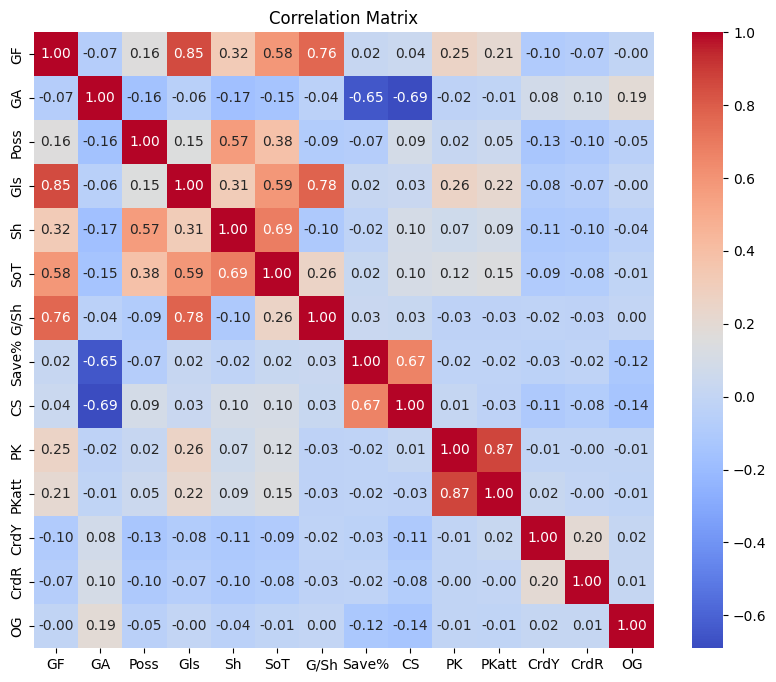

In [ ]:
# Calculate and display correlation matrix
# Select only numeric columns for correlation calculation
numerical_columns = epl_df.select_dtypes(include=np.number).columns
correlation_matrix = epl_df[numerical_columns].corr()

# Plot heatmap of correlations
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


# **BASIC DATA VISUALIZATION**

**DATA OVERVIEW**

Summary Statistics:
                                Date           GF           GA    Attendance  \
count                           9081  9081.000000  9081.000000   7983.000000   
mean   2010-12-22 02:01:56.551040512     1.318027     1.315824  35671.956783   
min              2003-08-16 00:00:00     0.000000     0.000000  10242.000000   
25%              2006-05-07 00:00:00     0.000000     0.000000  25008.000000   
50%              2009-05-24 00:00:00     1.000000     1.000000  32115.000000   
75%              2015-05-16 00:00:00     2.000000     2.000000  42453.000000   
max              2018-05-13 00:00:00     8.000000     8.000000  83222.000000   
std                              NaN     1.227598     1.227180  14352.150945   

              Poss          Gls           Sh          SoT         G/Sh  \
count  3001.000000  9081.000000  3001.000000  3001.000000  3000.000000   
mean     50.119627     1.282458    12.707098     4.210263     0.100577   
min      18.000000     0.000000     0

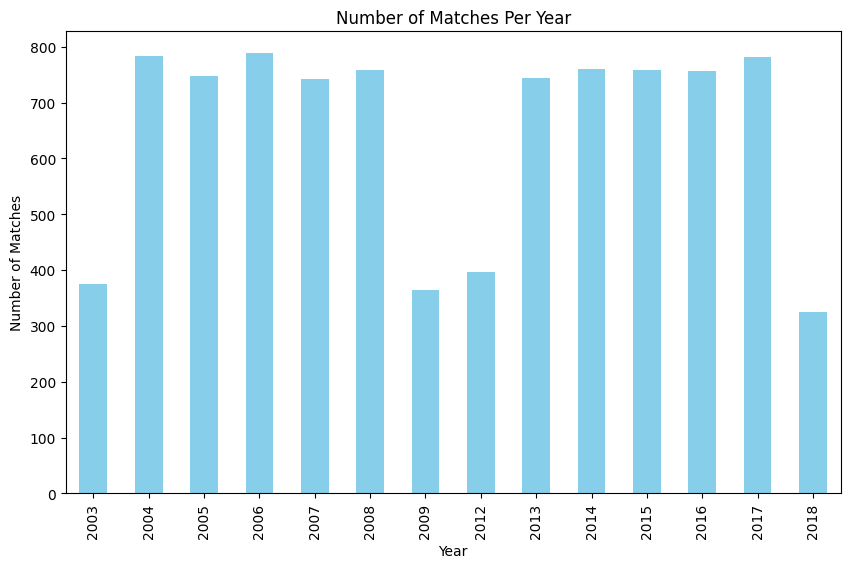

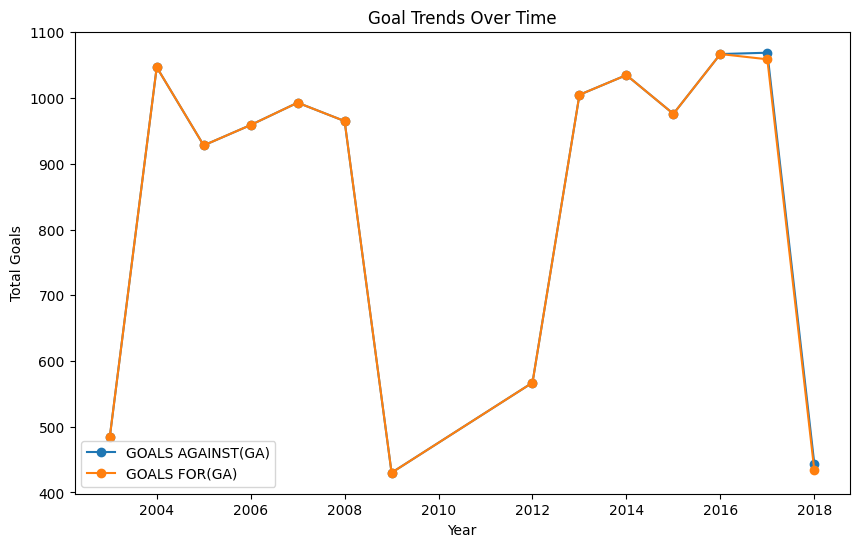

Home vs Away Performance:
              GF        GA       Poss
Venue                               
Away   1.128826  1.506056  48.657562
Home   1.507269  1.125551  51.582667


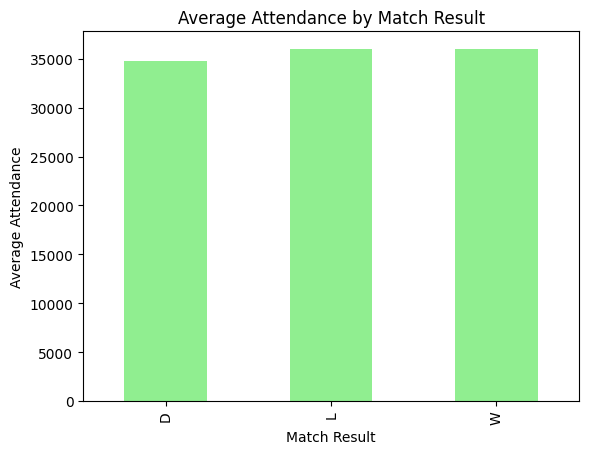

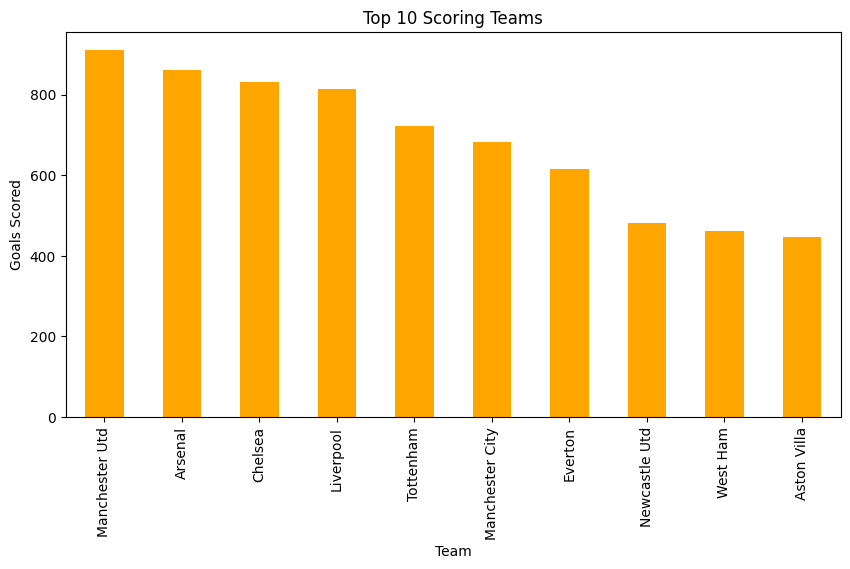

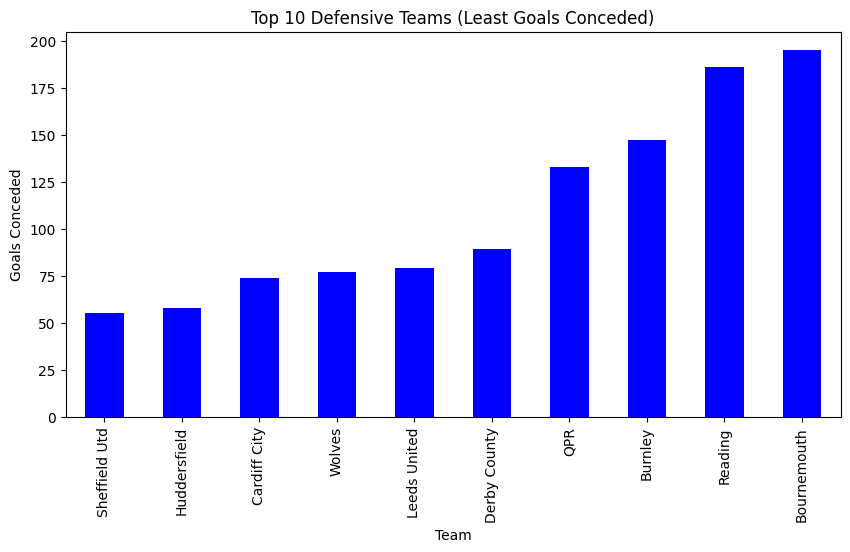

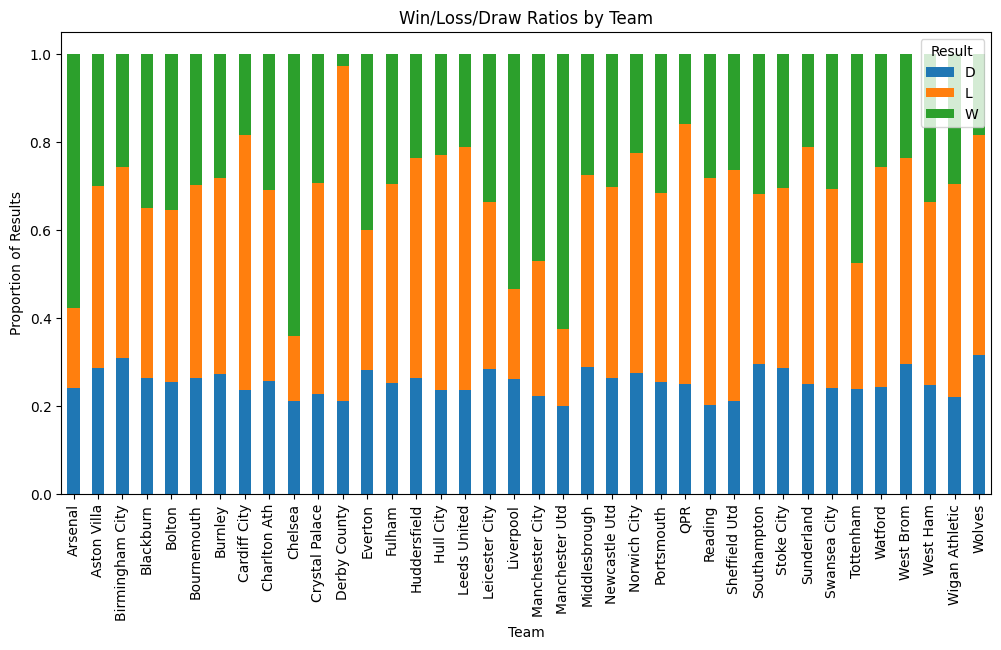

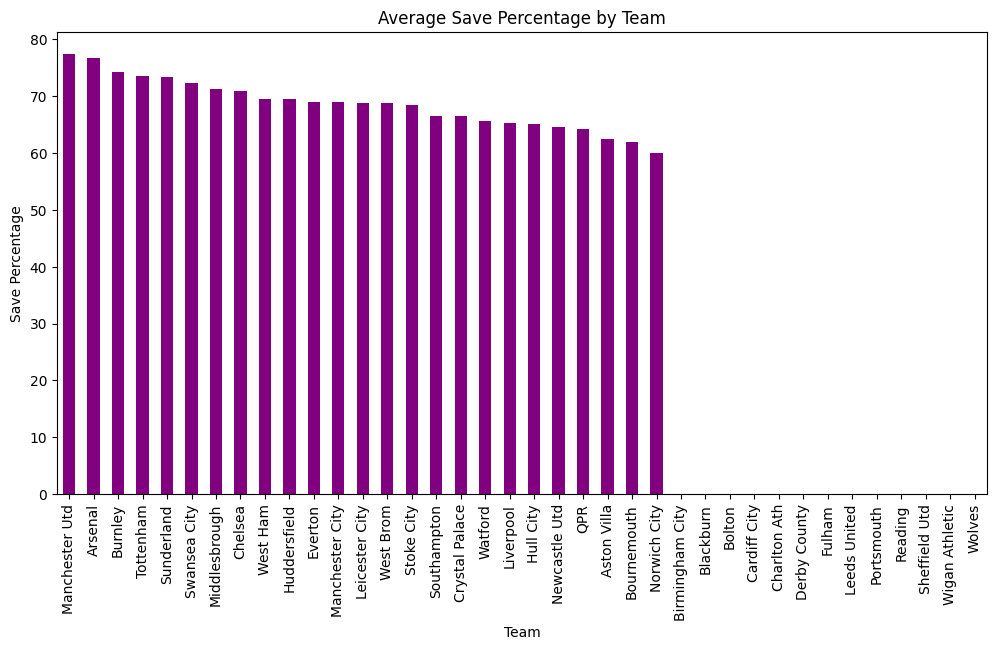

Top Referees by Average Yellow Cards:
                    CrdY      CrdR        PK
Referee                                    
Robert Martin  3.000000  0.000000  0.500000
Philip Dowd    2.148148  0.111111  0.095238
Andy Madley    2.000000  0.000000  0.500000
Mark C         2.000000  0.000000  0.000000
David Coote    2.000000  0.000000  0.000000
Mike Dean      1.863636  0.105882  0.110754
Jonathan Moss  1.857143  0.085714  0.087336
Bobby Madley   1.833333  0.333333  0.083333
Mike Riley     1.803987  0.105263  0.078947
Craig Pawson   1.797030  0.079208  0.070093
Formation Effectiveness:
                            GF        GA
Formation                              
3-4-3◆               2.500000  2.000000
4-2-2-2              1.666667  0.888889
2003-04-03 00:00:00  1.532847  1.456204
4-1-2-1-2◆           1.525773  1.309278
4-2-3-1              1.475312  1.237113
4-3-2-1              1.470588  1.705882
2003-03-04 00:00:00  1.454690  1.310016
3-1-4-2              1.437500  0.937500
3-4-1-2

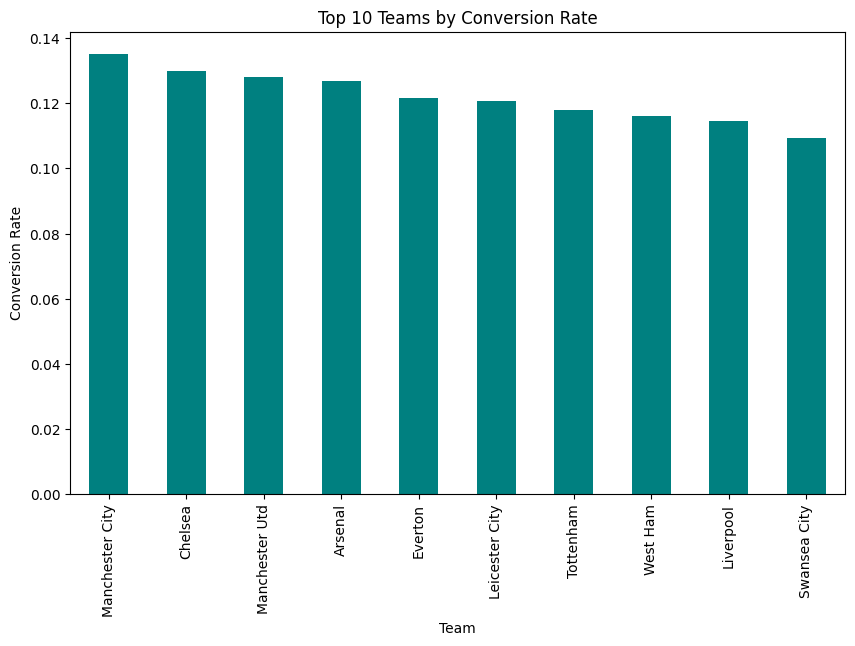

EDA Completed!


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

### 1. Data Overview ###
# Summary Statistics
print("Summary Statistics:")
print(epl_df.describe())

# Missing Values Analysis
print("Missing Values Analysis:")
print(epl_df.isnull().mean() * 100)

# Unique Counts
categorical_cols = ['Team', 'Opponent', 'Venue', 'Formation', 'Opp Formation', 'Captain', 'Referee']
for col in categorical_cols:
    print(f"Unique values in '{col}':\n", epl_df[col].unique(), "\n")


### 2. Time-Series Analysis ###
# Matches per Season
epl_df['Date'] = pd.to_datetime(epl_df['Date'])
epl_df['Year'] = epl_df['Date'].dt.year
matches_per_year = epl_df.groupby('Year').size()

plt.figure(figsize=(10, 6))
matches_per_year.plot(kind='bar', color='skyblue')
plt.title("Number of Matches Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Matches")
plt.show()

# Goal Trends Over Time
goal_trends = epl_df.groupby('Year')[['GF', 'GA']].sum()
goal_trends.plot(kind='line', marker='o', figsize=(10, 6))
plt.title("Goal Trends Over Time")
plt.xlabel("Year")
plt.ylabel("Total Goals")
plt.legend(["GOALS AGAINST(GA)", "GOALS FOR(GA)"])
plt.show()


### 3. Venue and Home Advantage ###
# Home vs. Away Performance
home_away_performance = epl_df.groupby('Venue')[['GF', 'GA', 'Poss']].mean()
print("Home vs Away Performance:\n", home_away_performance)

# Attendance Impact on Match Result
# Convert 'Attendance' column to numeric, handling errors
epl_df['Attendance'] = pd.to_numeric(epl_df['Attendance'], errors='coerce')
attendance_result = epl_df.groupby('Result')['Attendance'].mean()

attendance_result.plot(kind='bar', color='lightgreen')
plt.title("Average Attendance by Match Result")
plt.xlabel("Match Result")
plt.ylabel("Average Attendance")
plt.show()


### 4. Team Performance ###
# Top Scoring and Defensive Teams
top_teams_scoring = epl_df.groupby('Team')['GF'].sum().sort_values(ascending=False).head(10)
top_teams_defensive = epl_df.groupby('Team')['GA'].sum().sort_values().head(10)

plt.figure(figsize=(10, 5))
top_teams_scoring.plot(kind='bar', color='orange')
plt.title("Top 10 Scoring Teams")
plt.xlabel("Team")
plt.ylabel("Goals Scored")
plt.show()

plt.figure(figsize=(10, 5))
top_teams_defensive.plot(kind='bar', color='blue')
plt.title("Top 10 Defensive Teams (Least Goals Conceded)")
plt.xlabel("Team")
plt.ylabel("Goals Conceded")
plt.show()

# Win/Loss Ratios
win_loss_ratio = epl_df.groupby('Team')['Result'].value_counts(normalize=True).unstack().fillna(0)
win_loss_ratio.plot(kind='bar', stacked=True, figsize=(12, 6))
plt.title("Win/Loss/Draw Ratios by Team")
plt.xlabel("Team")
plt.ylabel("Proportion of Results")
plt.show()


### 5. Player and Referee Impact ###
# Save Percentage by Team
save_percentage = epl_df.groupby('Team')['Save%'].mean().sort_values(ascending=False)
save_percentage.plot(kind='bar', color='purple', figsize=(12, 6))
plt.title("Average Save Percentage by Team")
plt.xlabel("Team")
plt.ylabel("Save Percentage")
plt.show()

# Referee Influence on Fouls and Cards
referee_impact = epl_df.groupby('Referee')[['CrdY', 'CrdR', 'PK']].mean().sort_values(by='CrdY', ascending=False).head(10)
print("Top Referees by Average Yellow Cards:\n", referee_impact)


### 6. Tactical Analysis ###
# Formation Effectiveness
formation_effectiveness = epl_df.groupby('Formation')[['GF', 'GA']].mean().sort_values(by='GF', ascending=False)
print("Formation Effectiveness:\n", formation_effectiveness)

# Shots and Conversion Rates
epl_df['Conversion Rate'] = epl_df['Gls'] / epl_df['Sh']
conversion_by_team = epl_df.groupby('Team')['Conversion Rate'].mean().sort_values(ascending=False).head(10)
conversion_by_team.plot(kind='bar', color='teal', figsize=(10, 6))
plt.title("Top 10 Teams by Conversion Rate")
plt.xlabel("Team")
plt.ylabel("Conversion Rate")
plt.show()


### 8. Optional: Weather and Holiday Factors ###
# Example placeholder - requires weather and holiday data integration

print("EDA Completed!")


**## Average goals scored and conceded by each team**

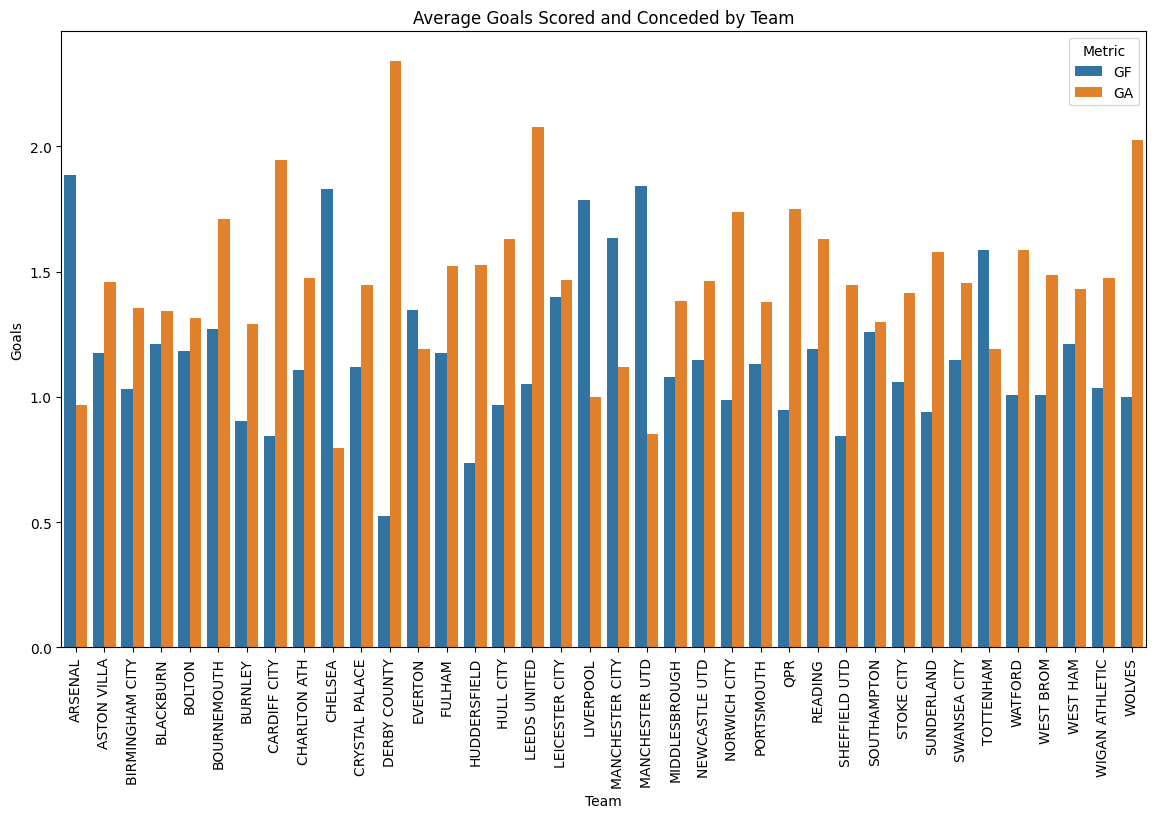

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Average goals scored and conceded by each team
team_goals = epl_df.groupby('Team').agg({'GF': 'mean', 'GA': 'mean'}).reset_index()
team_goals = team_goals.melt(id_vars="Team", value_vars=["GF", "GA"], var_name="Metric", value_name="Goals")

plt.figure(figsize=(14, 8))
sns.barplot(data=team_goals, x="Team", y="Goals", hue="Metric")
plt.xticks(rotation=90)
plt.title("Average Goals Scored and Conceded by Team")
plt.show()



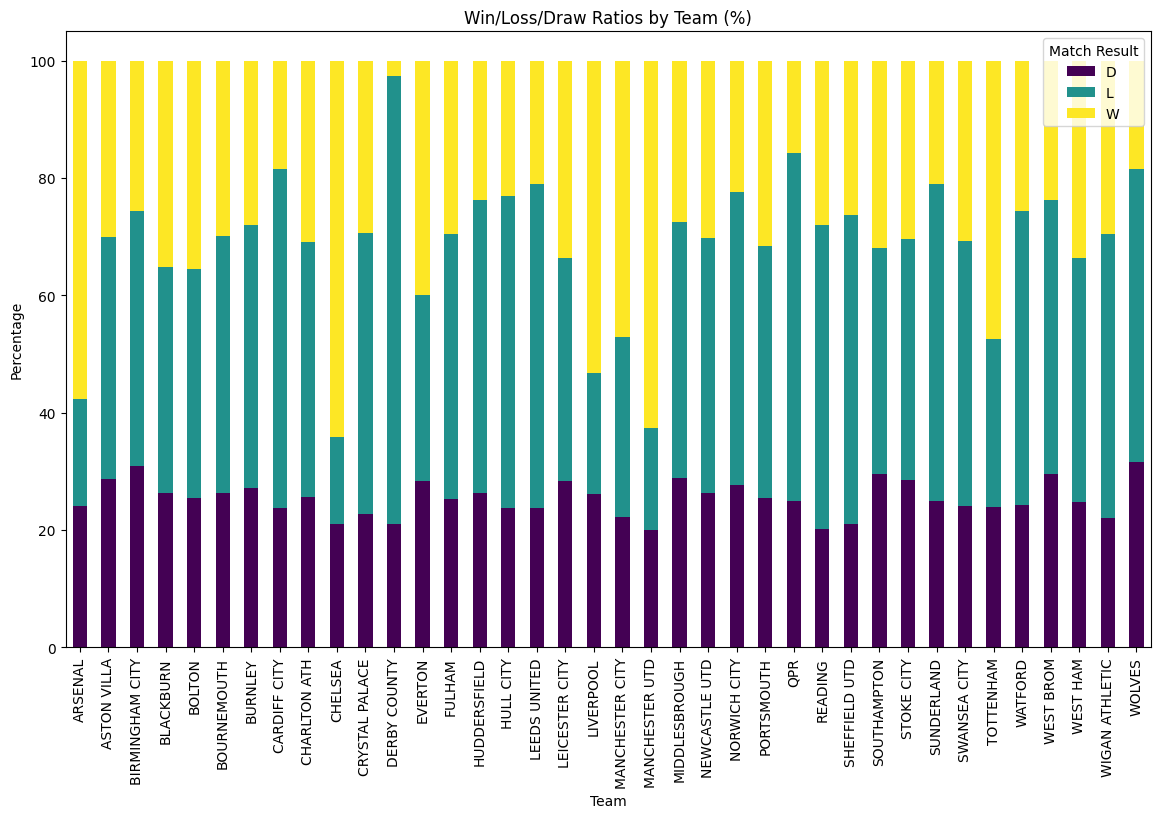

In [ ]:
# Win/Loss/Draw Ratios by Team
team_results = epl_df.groupby('Team')['Result'].value_counts(normalize=True).unstack().fillna(0) * 100

team_results.plot(kind='bar', stacked=True, figsize=(14, 8), colormap="viridis")
plt.title("Win/Loss/Draw Ratios by Team (%)")
plt.xlabel("Team")
plt.ylabel("Percentage")
plt.legend(title="Match Result")
plt.show()

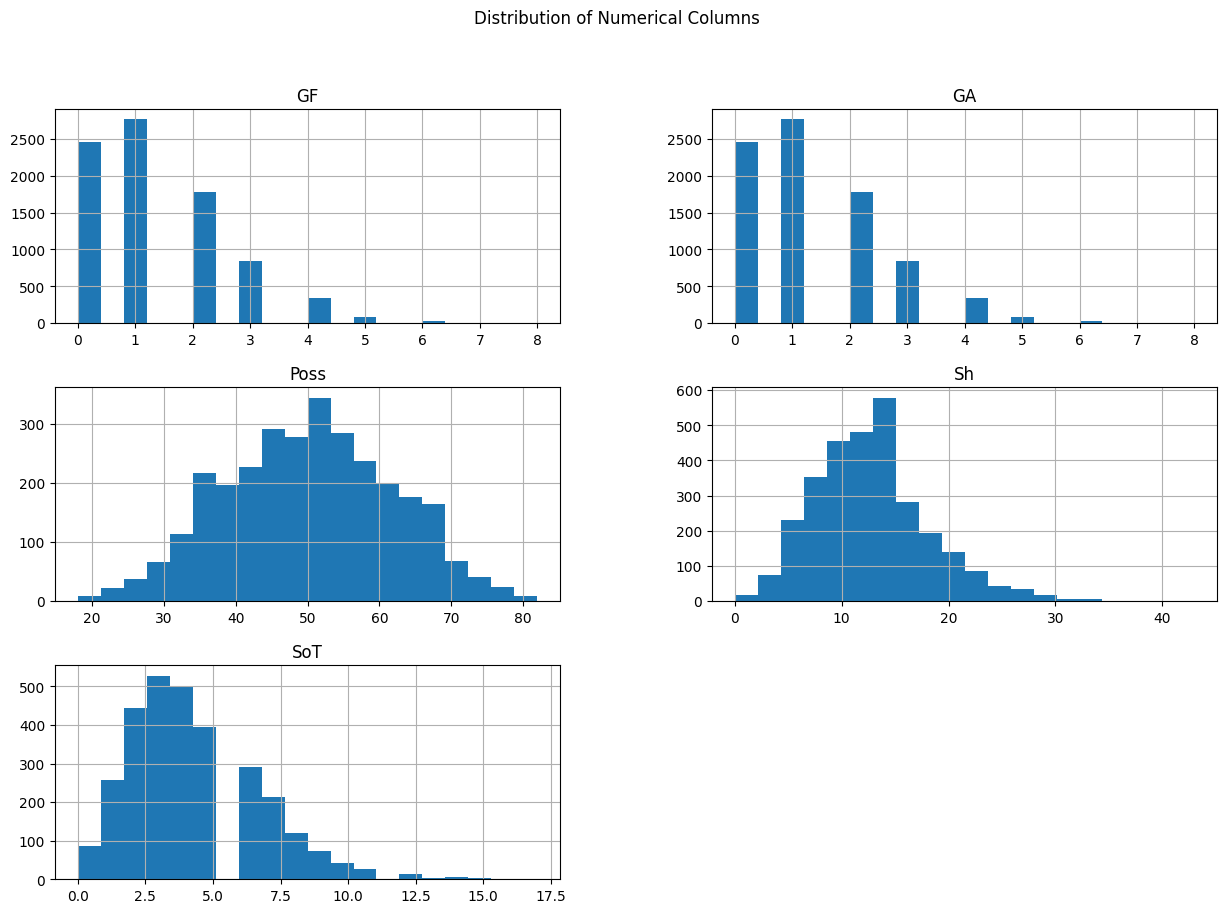

In [ ]:
import matplotlib.pyplot as plt

# Histogram for numerical columns
epl_df[['GF', 'GA', 'Poss', 'Sh', 'SoT', 'Attendance']].hist(bins=20, figsize=(15, 10))
plt.suptitle("Distribution of Numerical Columns")
plt.show()


# EDA PROBLEM 1
**"Which Teams Excel in Key Metrics Such as Average Goals, Clean Sheets, and Win Rate?"**

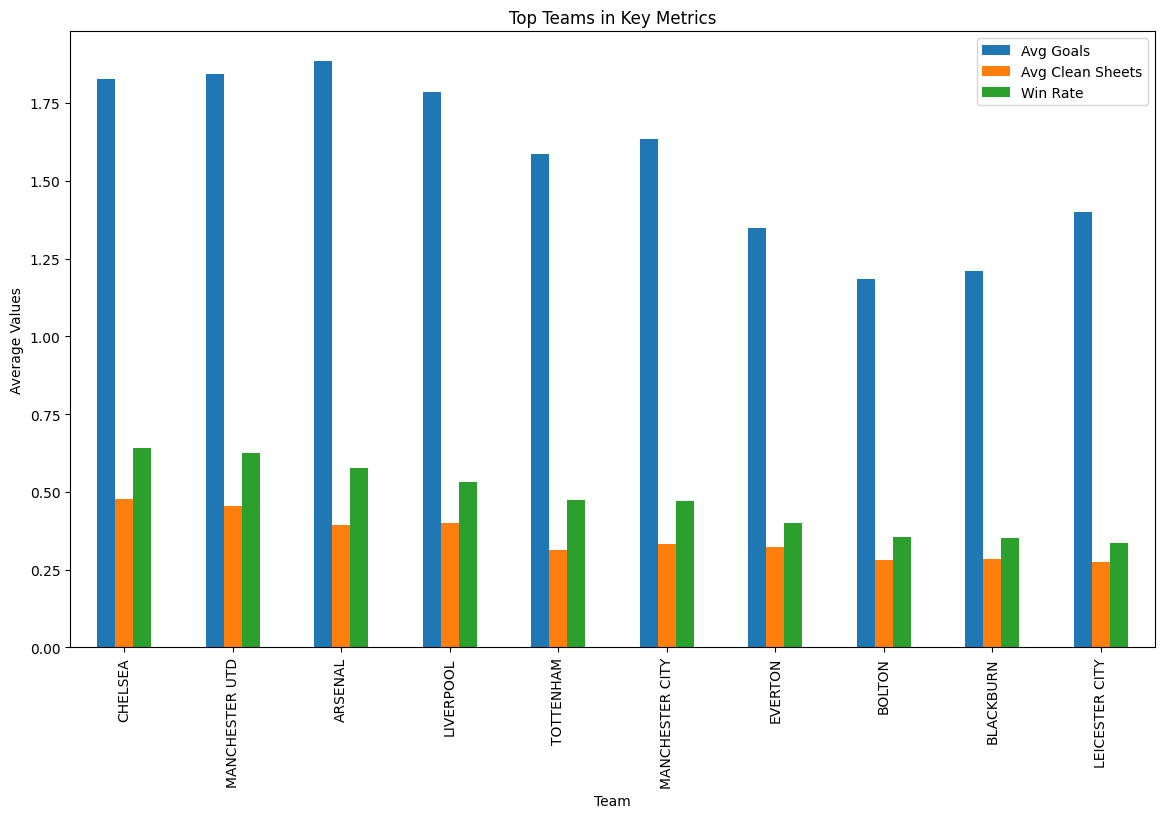

<ipython-input-22-15f4240ef3af>:17: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  team_seasonal_win_rate = epl_df.groupby(['Season', 'Team']).apply(lambda x: (x['Result'] == 'W').mean()).unstack().fillna(0)


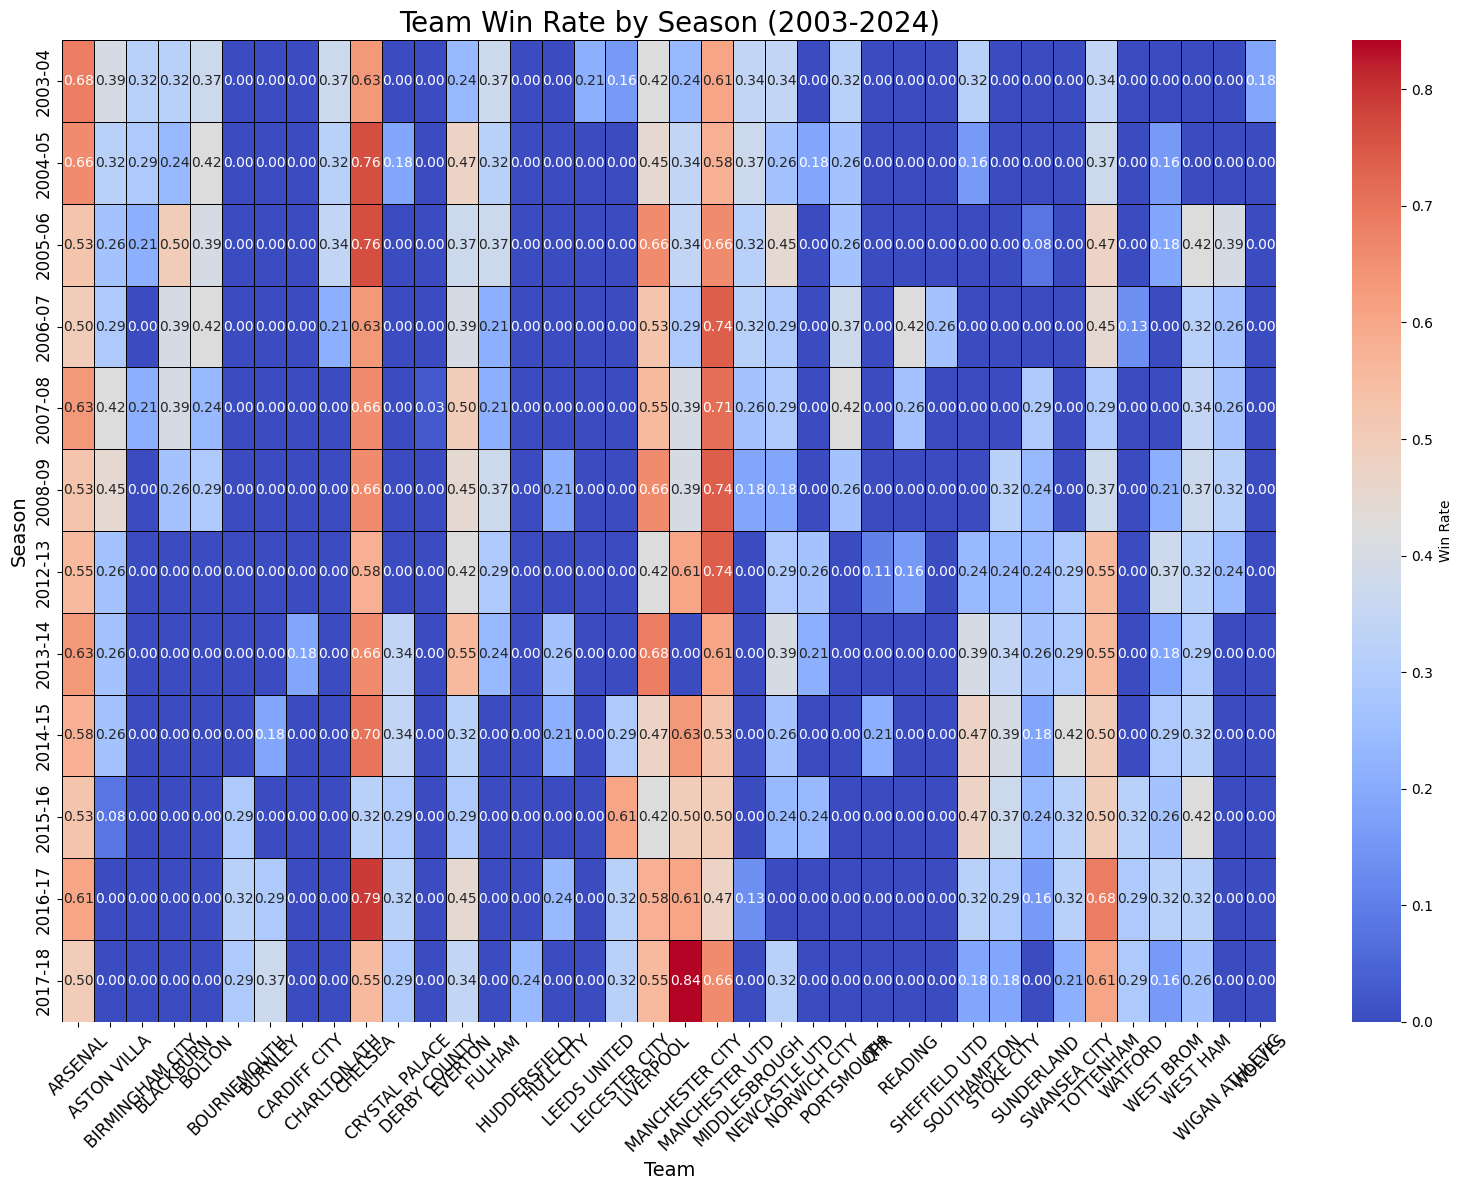

In [ ]:

# Top Teams in Key Metrics
top_teams_metrics = epl_df.groupby('Team').agg({'GF': 'mean', 'CS': 'mean', 'Result': lambda x: (x == 'W').mean()}).rename(columns={'GF': 'Avg Goals', 'CS': 'Avg Clean Sheets', 'Result': 'Win Rate'}).nlargest(10, 'Win Rate')

top_teams_metrics.plot(kind='bar', figsize=(14, 8))
plt.title("Top Teams in Key Metrics")
plt.ylabel("Average Values")
plt.legend(["Avg Goals", "Avg Clean Sheets", "Win Rate"])
plt.show()

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already defined and contains the necessary data

# Calculate Win Rate by Season for Each Team
team_seasonal_win_rate = epl_df.groupby(['Season', 'Team']).apply(lambda x: (x['Result'] == 'W').mean()).unstack().fillna(0)

# Set a larger figure size for better visibility
plt.figure(figsize=(16, 12))

# Create a heatmap with enhanced visual features
sns.heatmap(
    team_seasonal_win_rate,
    cmap="coolwarm",  # A contrasting color palette
    annot=True,  # Show values
    fmt=".2f",  # Format numbers
    cbar_kws={'label': 'Win Rate'},  # Color bar label
    linewidths=0.5,  # Add lines between cells
    linecolor='black',  # Color of the lines
    annot_kws={"size": 10}  # Size of annotation text
)

# Adding title and labels with increased font sizes for clarity
plt.title("Team Win Rate by Season (2003-2024)", fontsize=20)
plt.xlabel("Team", fontsize=14)
plt.ylabel("Season", fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)  # Set y-axis font size

# Show the heatmap
plt.tight_layout()  # Adjust layout to make room for the rotated x labels
plt.show()


# **# EDA PROBLEM 2**
**Impact of yellow and red cards (CrdY, CrdR) on match outcomes (Result)?**

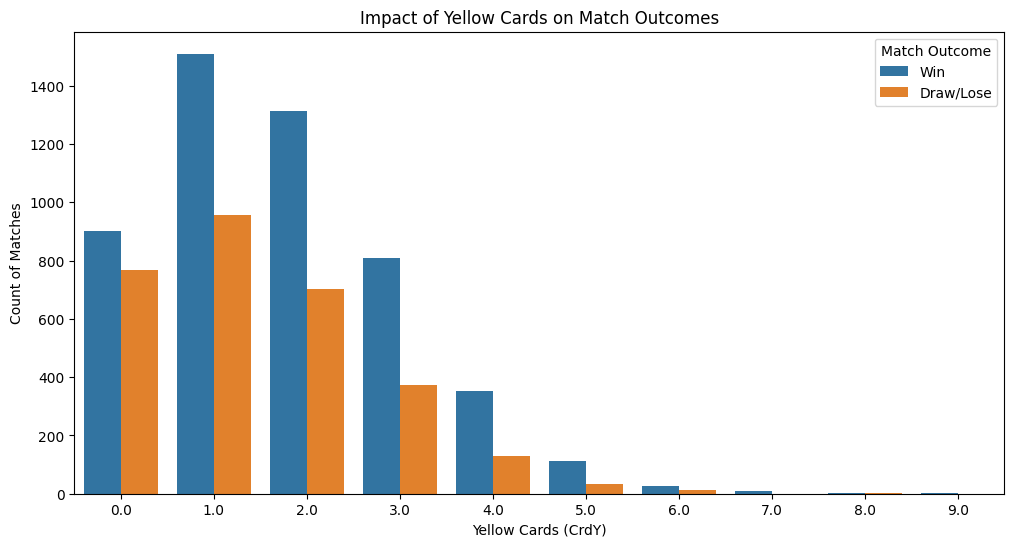

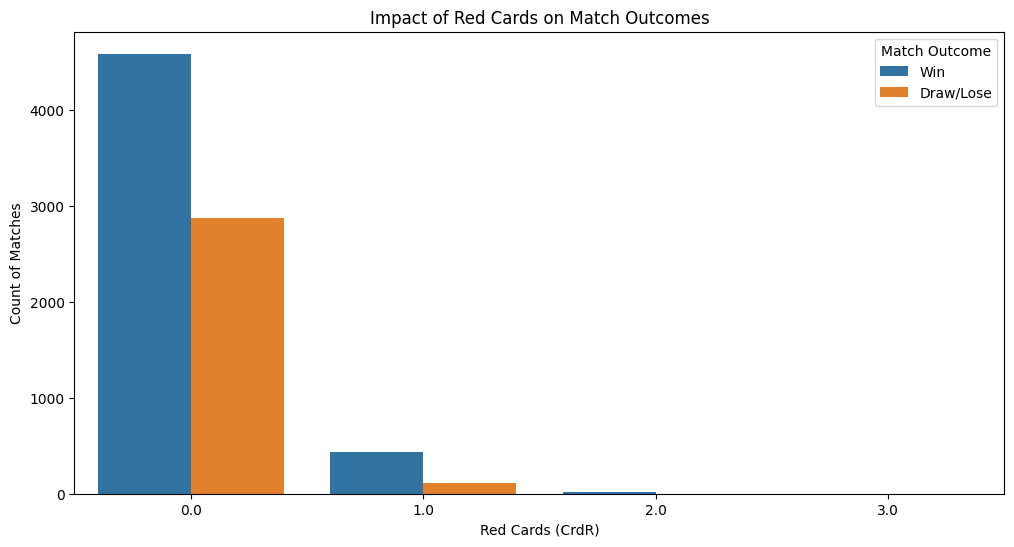

Optimization terminated successfully.
         Current function value: 0.648886
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                 8018
Model:                          Logit   Df Residuals:                     8015
Method:                           MLE   Df Model:                            2
Date:                Sun, 03 Nov 2024   Pseudo R-squ.:                 0.01659
Time:                        18:54:33   Log-Likelihood:                -5202.8
converged:                       True   LL-Null:                       -5290.6
Covariance Type:            nonrobust   LLR p-value:                 7.486e-39
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.2064      0.037     -5.551      0.000      -0.279      -0.134
CrdY          -0.1712      0.

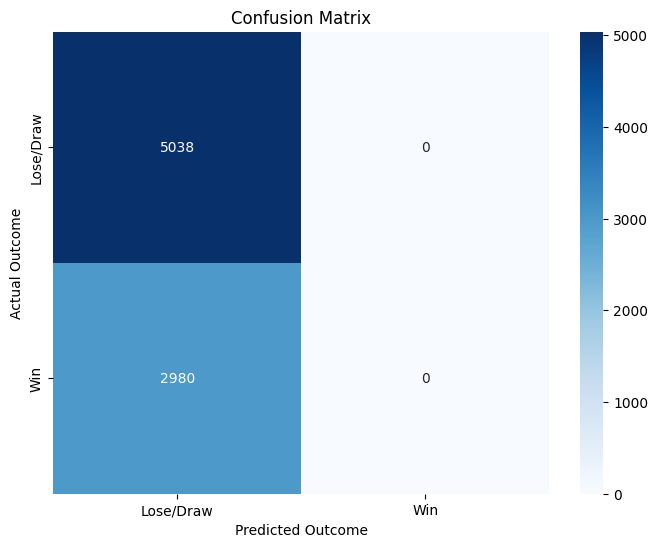

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
import numpy as np

# Clean the dataset (removing NaN values for the necessary columns)
epl_cleaned_df = epl_df[['Result', 'CrdY', 'CrdR']].dropna()

# Encode the 'Result' column to numerical values (Win=1, Draw/Lose=0)
# The change is here. We need to make sure the target variable is in range [0,1]
# We assign Win=1 and Lose/Draw = 0
epl_cleaned_df['Result'] = epl_cleaned_df['Result'].map({'W': 1, 'D': 0, 'L': 0})

# EDA: Visualizing the impact of cards on match results
plt.figure(figsize=(12, 6))
sns.countplot(data=epl_cleaned_df, x='CrdY', hue='Result')
plt.title("Impact of Yellow Cards on Match Outcomes")
plt.xlabel("Yellow Cards (CrdY)")
plt.ylabel("Count of Matches")
plt.legend(title='Match Outcome', loc='upper right', labels=['Win', 'Draw/Lose'])  # Update legend
plt.show()

plt.figure(figsize=(12, 6))
sns.countplot(data=epl_cleaned_df, x='CrdR', hue='Result')
plt.title("Impact of Red Cards on Match Outcomes")
plt.xlabel("Red Cards (CrdR)")
plt.ylabel("Count of Matches")
plt.legend(title='Match Outcome', loc='upper right', labels=['Win', 'Draw/Lose'])  # Update legend
plt.show()

# Define independent variables (CrdY, CrdR) and dependent variable (Result)
X = epl_cleaned_df[['CrdY', 'CrdR']]
y = epl_cleaned_df['Result']

# Add a constant to the model (required for statsmodels)
X = sm.add_constant(X)

# Fit the logistic regression model
model = sm.Logit(y, X).fit()

# Print out the model summary
print(model.summary())

# Predictions
predictions = model.predict(X)

# Convert predictions to binary outcome based on a threshold (0.5)
predicted_classes = np.where(predictions >= 0.5, 1, 0)

# Create a confusion matrix to evaluate the model performance
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y, predicted_classes)

# Visualizing the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Lose/Draw', 'Win'], yticklabels=['Lose/Draw', 'Win'])  # Update labels
plt.title('Confusion Matrix')
plt.xlabel('Predicted Outcome')
plt.ylabel('Actual Outcome')
plt.show()

# EDA PROBLEM 3
**"Which Team Achieves the Highest Win Rate Each Season?"**

Index(['Season', 'Date', 'Time', 'Round', 'Day', 'Venue', 'Result', 'GF', 'GA',
       'Team', 'Opponent', 'Attendance', 'Formation', 'Opp Formation',
       'Captain', 'Referee', 'Poss', 'Gls', 'Sh', 'SoT', 'G/Sh', 'Save%', 'CS',
       'PK', 'PKatt', 'CrdY', 'CrdR', 'OG'],
      dtype='object')


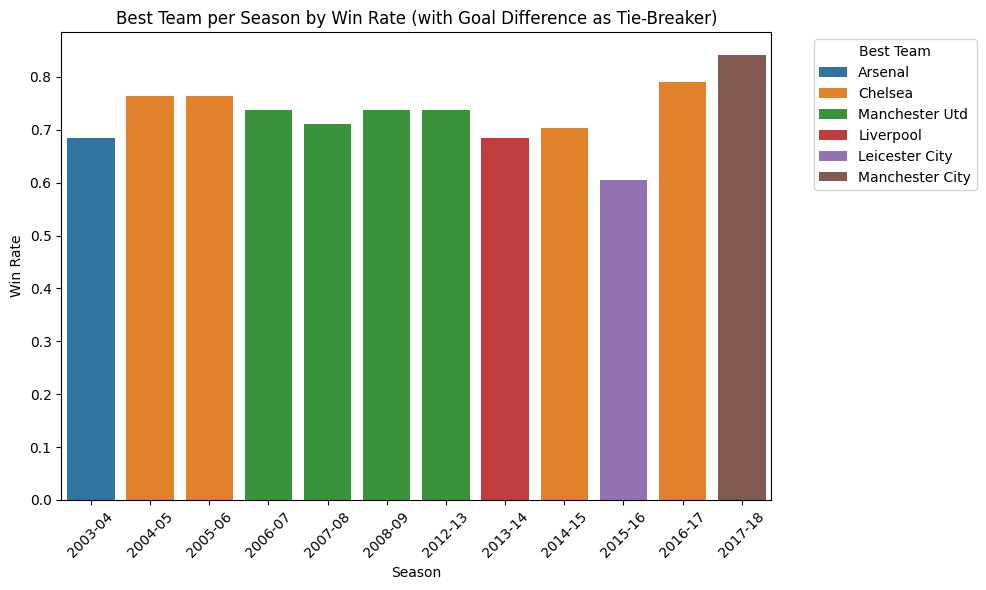

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load your dataset
epl_df = pd.read_excel('/content/final_data eda.xlsx')  # Adjust the file path as necessary

# Check the column names
print(epl_df.columns)

# Calculate win rate and goal difference by season for each team
team_season_stats = epl_df.groupby(['Season', 'Team']).agg(
    Wins=('Result', lambda x: (x == 'W').sum()),
    Games_Played=('Result', 'size'),
    Goals_Scored=('GF', 'sum'),
    Goals_Conceded=('GA', 'sum')
).reset_index()

# Add calculated metrics for win rate and goal difference
team_season_stats['Win_Rate'] = team_season_stats['Wins'] / team_season_stats['Games_Played']
team_season_stats['Goal_Difference'] = team_season_stats['Goals_Scored'] - team_season_stats['Goals_Conceded']

# Sort each season by Win Rate and Goal Difference, and select the top team
best_teams = team_season_stats.sort_values(['Season', 'Win_Rate', 'Goal_Difference'], ascending=[True, False, False])
best_teams = best_teams.groupby('Season').first().reset_index()

# Plotting the best team per season
plt.figure(figsize=(10, 6))
sns.barplot(data=best_teams, x='Season', y='Win_Rate', hue='Team', dodge=False)
plt.title("Best Team per Season by Win Rate (with Goal Difference as Tie-Breaker)")
plt.xlabel("Season")
plt.ylabel("Win Rate")
plt.xticks(rotation=45)
plt.legend(title="Best Team", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


# EDA PROBLEM 4
**Effectiveness of High Pressing Tactics**

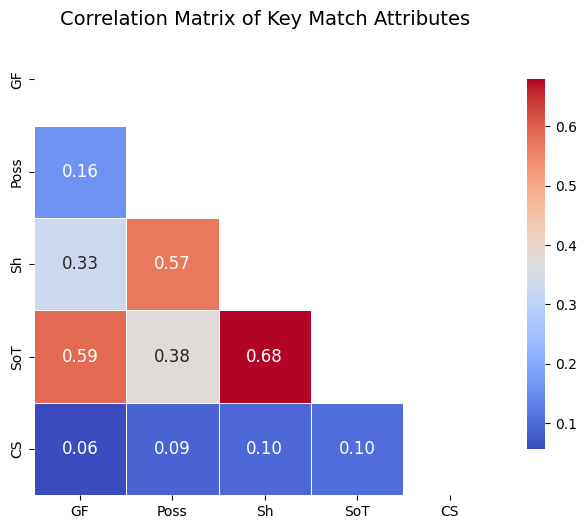

<ipython-input-37-abf29f4ea702>:35: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goals_by_cs, x='CS', y='GF', palette='Set2')


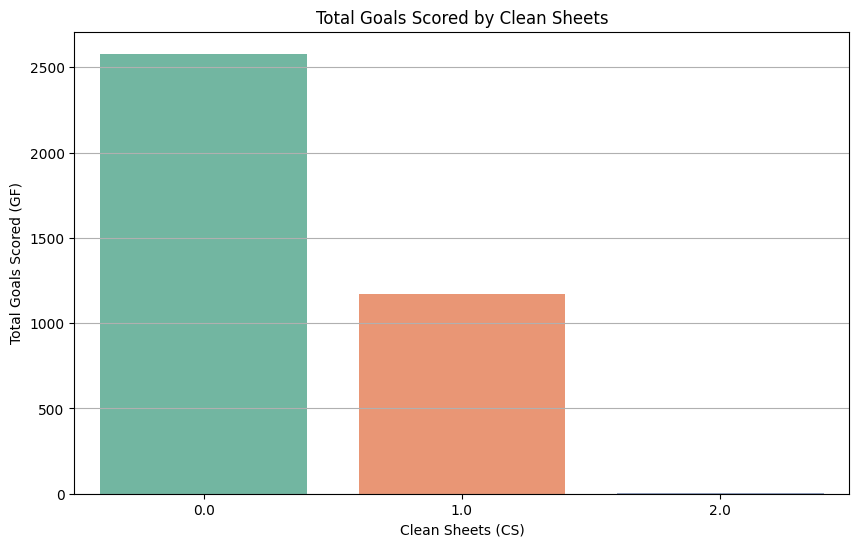

<ipython-input-37-abf29f4ea702>:47: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=goals_by_possession, x='Poss', y='GF', palette='viridis')


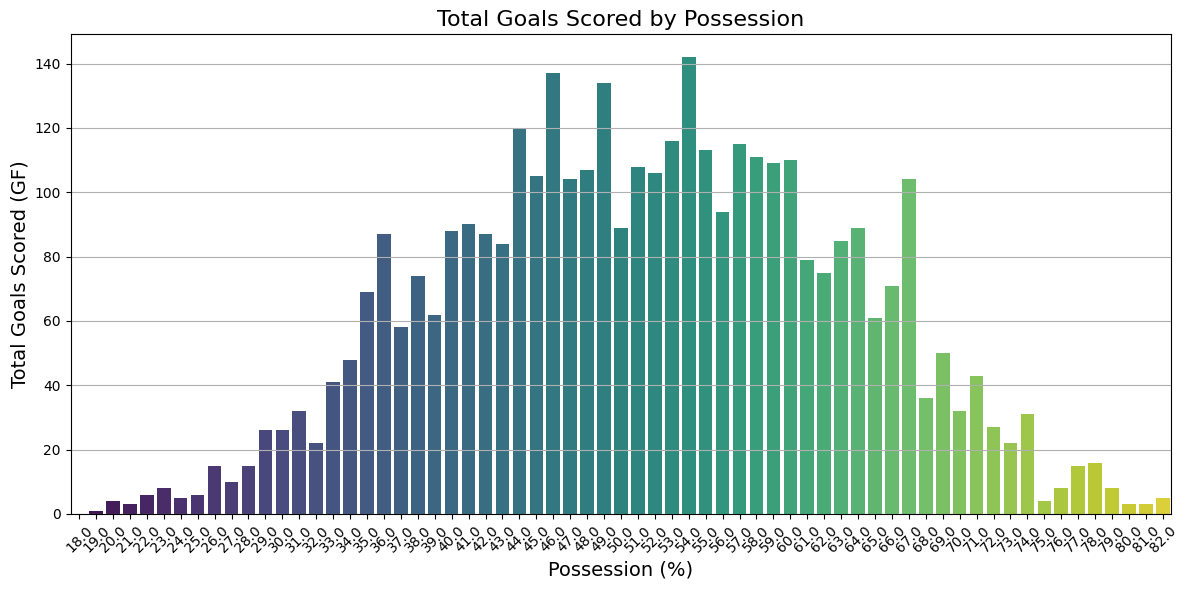

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Load your dataset
epl_df = pd.read_excel('/content/final_data eda.xlsx')

# Keep only the relevant columns and drop rows with NaN values
epl_cleaned_df = epl_df[['GF', 'Poss', 'Sh', 'SoT', 'CS']].dropna()

# --- Exploratory Data Analysis (EDA) ---

# 1. Correlation Matrix Visualization
plt.figure(figsize=(8, 6))

# Compute the correlation matrix
correlation_matrix = epl_cleaned_df.corr()

# Create a mask for the upper triangle
mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))

# Set up the matplotlib figure
sns.heatmap(correlation_matrix, mask=mask, annot=True, cmap='coolwarm', fmt='.2f',
            linewidths=.5, cbar_kws={"shrink": .8}, annot_kws={"size": 12}, square=True)

plt.title('Correlation Matrix of Key Match Attributes', fontsize=14)
plt.show()

# 3. Bar Graph for Goals Scored vs. Clean Sheets
# Group by Clean Sheets and sum Goals Scored
goals_by_cs = epl_cleaned_df.groupby('CS')['GF'].sum().reset_index()

plt.figure(figsize=(10, 6))
sns.barplot(data=goals_by_cs, x='CS', y='GF', palette='Set2')
plt.title('Total Goals Scored by Clean Sheets')
plt.xlabel('Clean Sheets (CS)')
plt.ylabel('Total Goals Scored (GF)')
plt.grid(axis='y')  # Add grid lines for better readability
plt.show()

# Bar Graph for Possession vs. Goals Scored
# Group by Possession and sum Goals Scored
goals_by_possession = epl_cleaned_df.groupby('Poss')['GF'].sum().reset_index()

plt.figure(figsize=(12, 6))  # Increase the figure size for better visibility
sns.barplot(data=goals_by_possession, x='Poss', y='GF', palette='viridis')
plt.title('Total Goals Scored by Possession', fontsize=16)
plt.xlabel('Possession (%)', fontsize=14)
plt.ylabel('Total Goals Scored (GF)', fontsize=14)
plt.grid(axis='y')  # Add grid lines for better readability
plt.xticks(rotation=45)  # Rotate x-axis labels for better visibility
plt.tight_layout()  # Adjust the layout to prevent clipping of tick-labels
plt.show()


# EDA PROBLEM 5
**How do matchday factors like venue, day of the week, and referee decisions affect team performance metrics (goals scored, shots, clean sheets), and how does opponent formation influence these dynamics across seasons?**

In [ ]:
import pandas as pd

# Load your dataset
epl_df = pd.read_excel('/content/final_data eda.xlsx')

# Clean the data by selecting relevant columns and dropping NaN values
epl_cleaned_df = epl_df[['Venue', 'Day', 'Referee', 'GF', 'Poss', 'Sh', 'CS', 'Opp Formation']].dropna()

# Group by venue, day of the week, referee, and opponent formation to get average performance metrics
performance_summary = epl_cleaned_df.groupby(['Venue', 'Day', 'Referee', 'Opp Formation']).agg({
    'GF': 'mean',
    'Poss': 'mean',
    'Sh': 'mean',
    'CS': 'mean'
}).reset_index()

# Display the summary statistics
print("Average Team Performance Metrics by Matchday Factors:")
print(performance_summary)


Average Team Performance Metrics by Matchday Factors:
     Venue  Day         Referee        Opp Formation   GF  Poss    Sh   CS
0     Away  Fri  Andre Marriner              4-1-4-1  3.0  52.0  13.0  0.0
1     Away  Fri  Anthony Taylor  2002-04-04 00:00:00  1.0  52.0  10.0  2.0
2     Away  Fri  Anthony Taylor  2003-04-03 00:00:00  0.0  68.0  12.0  0.0
3     Away  Fri  Anthony Taylor              4-2-3-1  0.0  57.0  13.0  0.0
4     Away  Fri    Craig Pawson  2003-03-04 00:00:00  0.0  68.0  16.0  0.0
...    ...  ...             ...                  ...  ...   ...   ...  ...
1030  Home  Wed   Robert Madley              4-4-1-1  2.0  65.5  16.0  0.5
1031  Home  Wed      Roger East  2002-04-04 00:00:00  4.0  56.0  18.0  0.0
1032  Home  Wed      Roger East              4-2-3-1  1.5  58.0  23.5  0.5
1033  Home  Wed      Roger East              4-4-1-1  1.0  62.0  11.0  0.0
1034  Home  Wed    Simon Hooper              4-4-1-1  1.0  52.0  13.0  0.0

[1035 rows x 8 columns]


<ipython-input-46-a6feb12f47da>:10: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=epl_df, x='Venue', y='GF', estimator='mean', ci=None) # Changed to use epl_df


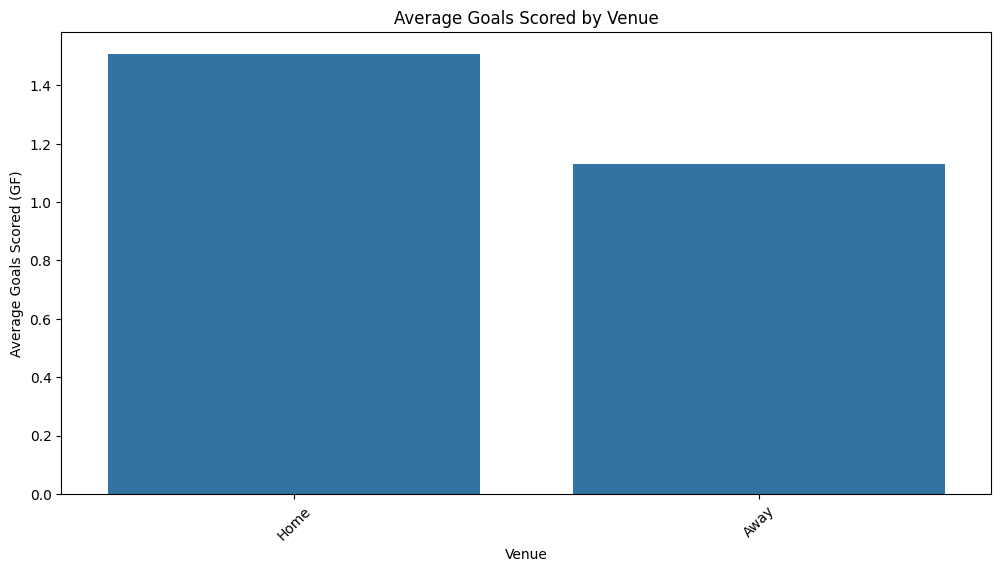

<ipython-input-46-a6feb12f47da>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=average_goals_by_day, x='Day', y='GF', palette='Set2')


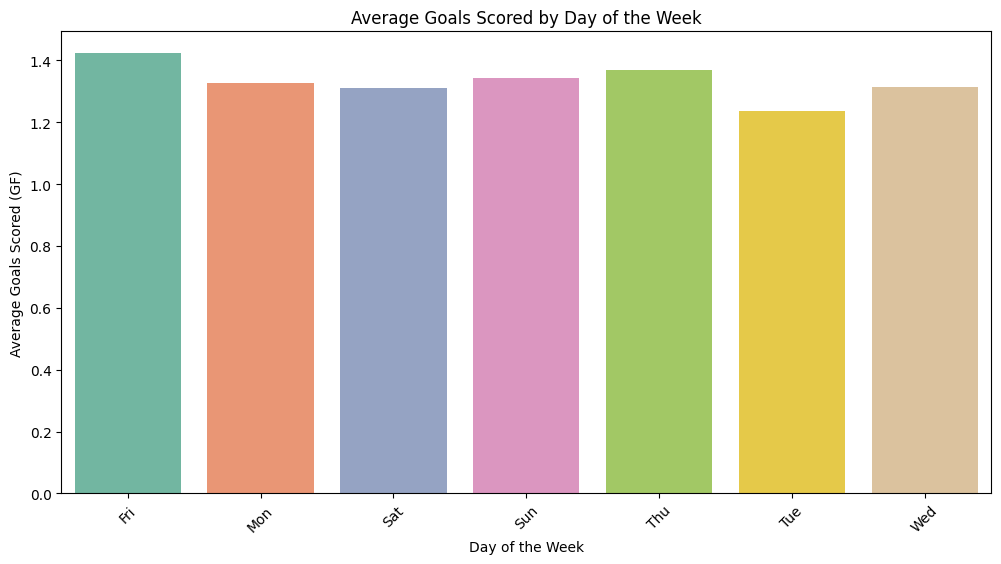

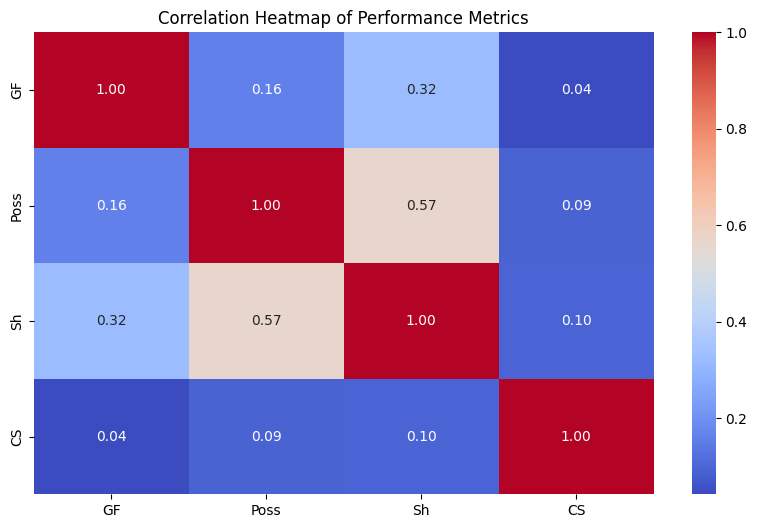

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'epl_df' is your original DataFrame containing the 'Day' column
# Load your dataset (if not already loaded)
# epl_df = pd.read_excel('/content/final_data eda.xlsx')

# 1. Bar plot for Goals Scored by Venue
plt.figure(figsize=(12, 6))
sns.barplot(data=epl_df, x='Venue', y='GF', estimator='mean', ci=None) # Changed to use epl_df
plt.title('Average Goals Scored by Venue')
plt.xlabel('Venue')
plt.ylabel('Average Goals Scored (GF)')
plt.xticks(rotation=45)
plt.show()

# 2. Bar plot for Average Goals Scored by Day of the Week
average_goals_by_day = epl_df.groupby('Day')['GF'].mean().reset_index() # Changed to use epl_df
plt.figure(figsize=(12, 6))
sns.barplot(data=average_goals_by_day, x='Day', y='GF', palette='Set2')
plt.title('Average Goals Scored by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Goals Scored (GF)')
plt.xticks(rotation=45)
plt.show()

# 4. Heatmap for the correlation of performance metrics
plt.figure(figsize=(10, 6))
correlation_matrix = epl_df[['GF', 'Poss', 'Sh', 'CS']].corr() # Changed to use epl_df
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Performance Metrics')
plt.show()